# MSA 2024 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
#Load the dataset
file_path = '../0. Resources/datasets/X store sales/store_sales.csv'
store_sales_df = pd.read_csv(file_path, encoding='latin1')

#Display basic information about the dataset
print(store_sales_df.info())

#Display statistical description of the numerical features in the dataset
print(store_sales_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

### Store Sales Dataset Field Descriptions

1. **Row ID**
   - Unique identifier for each row in the dataset.

2. **Order ID**
   - Unique identifier for each order.

3. **Order Date**
   - The date when the order was placed.

4. **Ship Date**
   - The date when the order was shipped.

5. **Ship Mode**
   - The mode of shipment (e.g., Second Class, Standard Class).

6. **Customer ID**
   - Unique identifier for each customer.

7. **Customer Name**
   - Name of the customer.

8. **Segment**
   - The market segment to which the customer belongs (e.g., Consumer, Corporate).

9. **Country**
   - Country where the order was placed.

10. **City**
    - City where the order was placed.

11. **State**
    - State where the order was placed.

12. **Postal Code**
    - Postal code of the location where the order was placed.

13. **Region**
    - Region where the order was placed (e.g., South, West).

14. **Product ID**
    - Unique identifier for each product.

15. **Category**
    - The category of the product (e.g., Furniture, Office Supplies).

16. **Sub-Category**
    - The sub-category of the product (e.g., Bookcases, Chairs).

17. **Product Name**
    - Name of the product.

18. **Sales**
    - The sales amount for the order.

19. **Quantity**
    - The quantity of the product ordered.

20. **Discount**
    - The discount applied to the order.

21. **Profit**
    - The profit gained from the order.


In [3]:
print(store_sales_df.head(10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

In [4]:
# Provide key statistical measures without hardcoding
numerical_columns = store_sales_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate and display mean and standard deviation for numerical columns
statistical_measures = store_sales_df[numerical_columns].agg(['mean', 'std'])
print(statistical_measures)

           Row ID   Postal Code       Sales  Quantity  Discount      Profit
mean  5041.643564  55726.556341  349.834887  3.785007  0.173923    8.699327
std   2885.740258  32261.888225  503.179145  2.251620  0.181547  136.049246


## 2. Visualise data

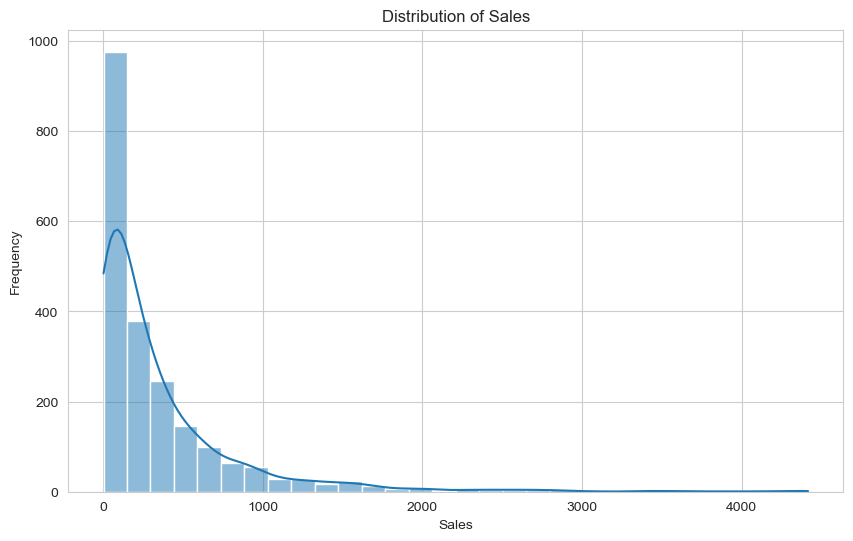

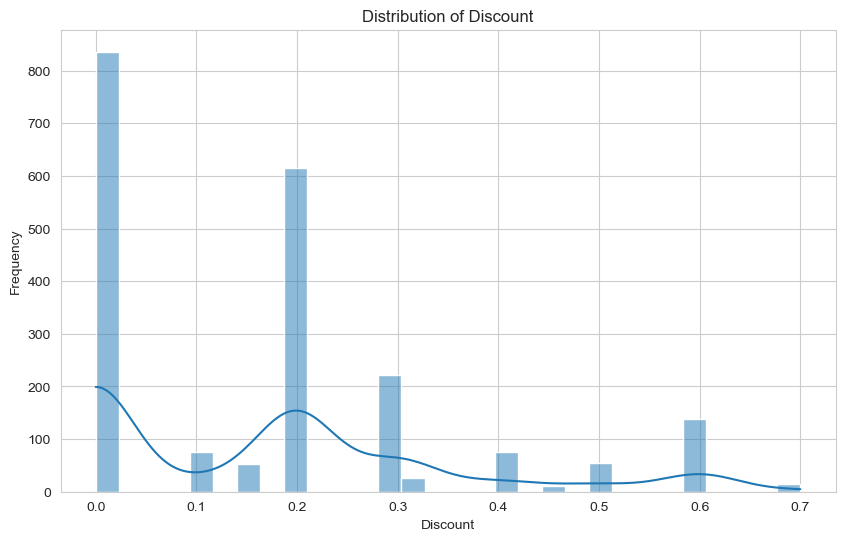

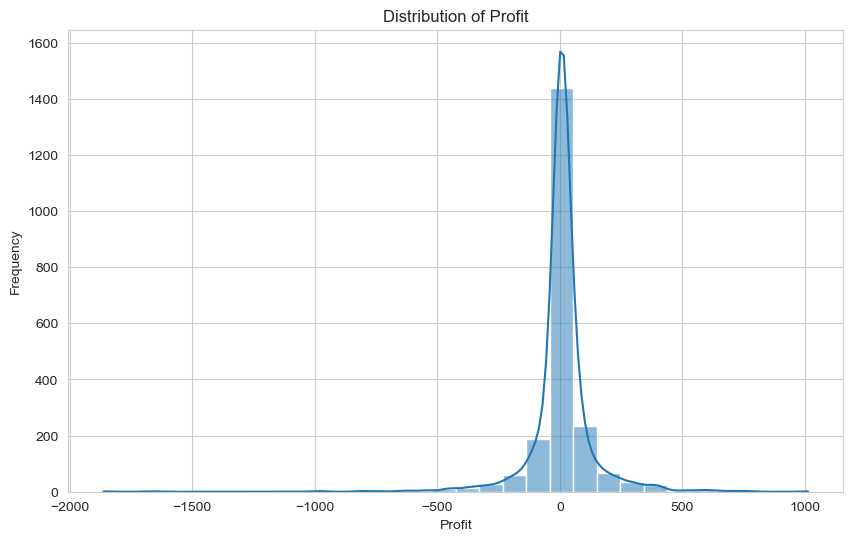

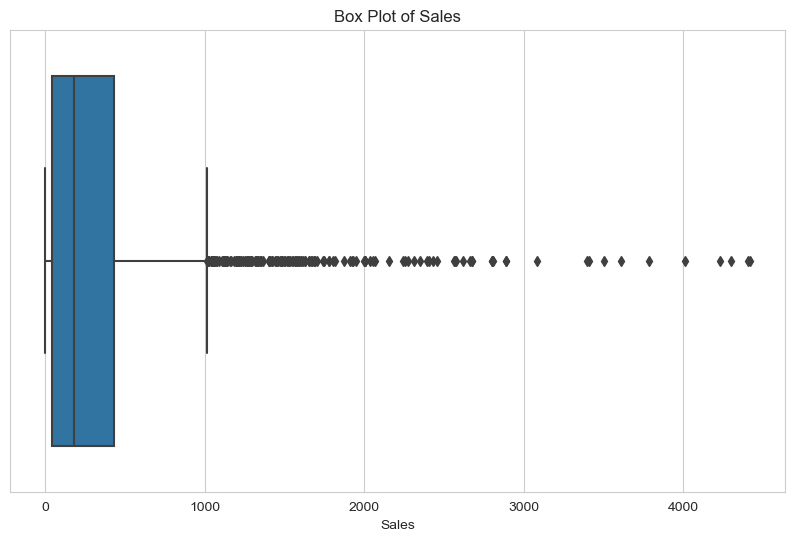

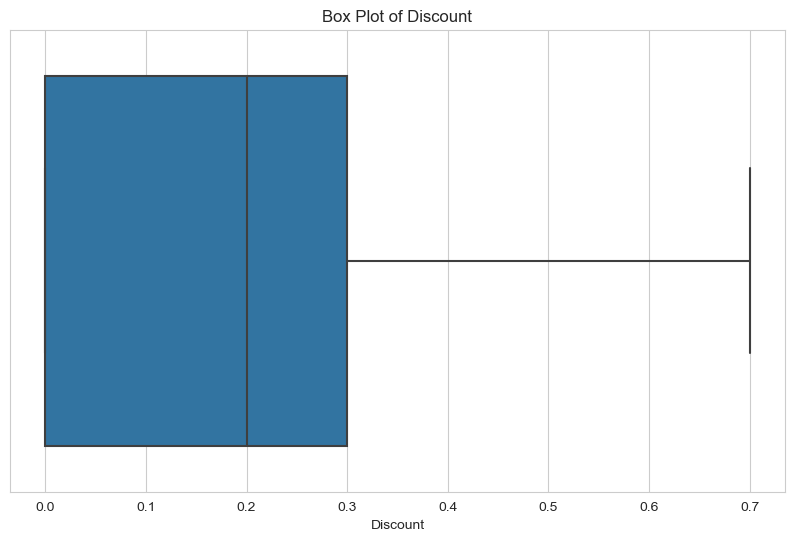

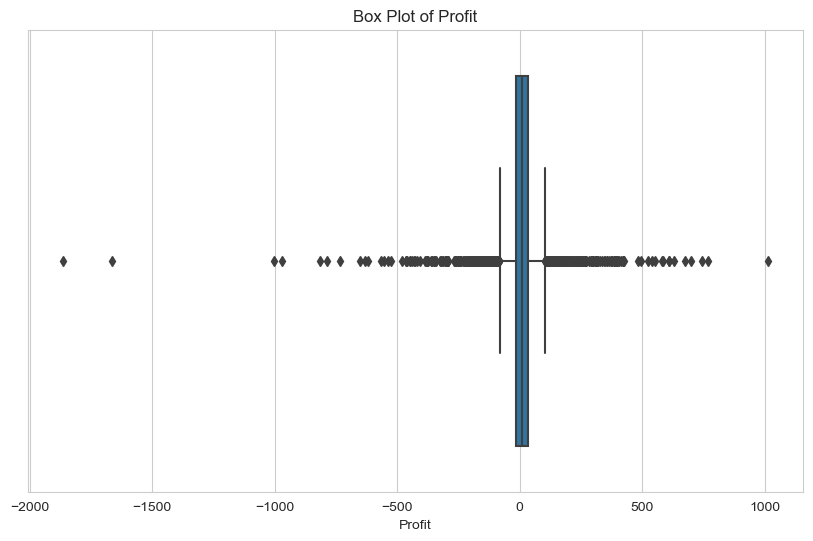

In [5]:
# Visualise the numerical data 
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define numerical columns(with meanings)
numerical_columns = store_sales_df.select_dtypes(include=['float64']).columns

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(store_sales_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=store_sales_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


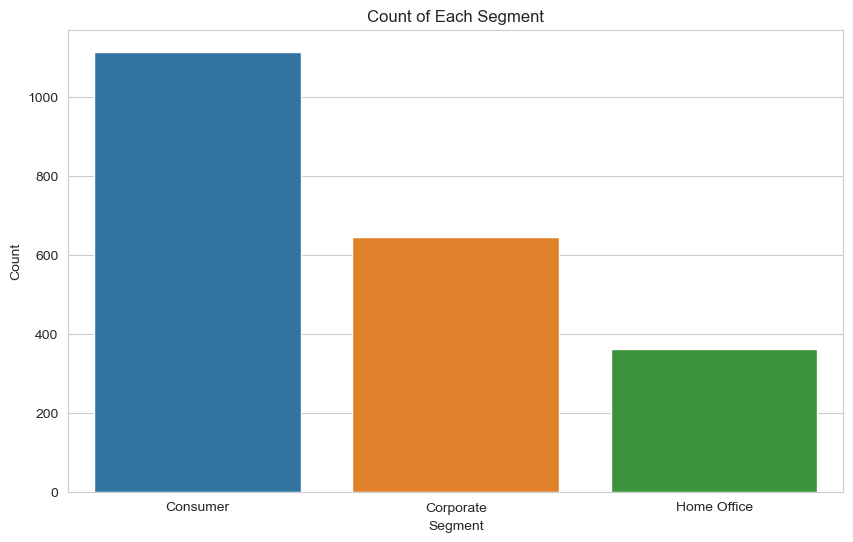

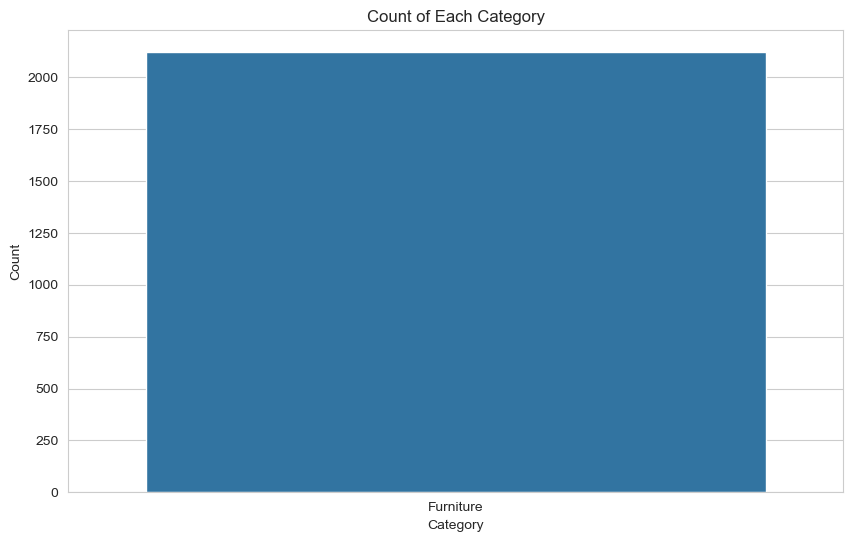

In [6]:
# Plot the count of each category in 'Segment'
plt.figure(figsize=(10, 6))
sns.countplot(data=store_sales_df, x='Segment')
plt.title('Count of Each Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Plot the count of each category in 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=store_sales_df, x='Category')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

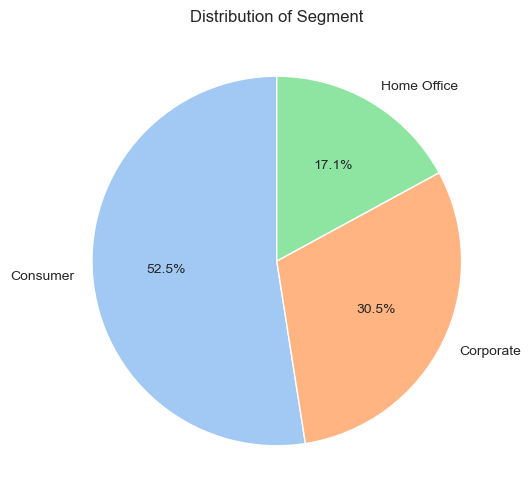

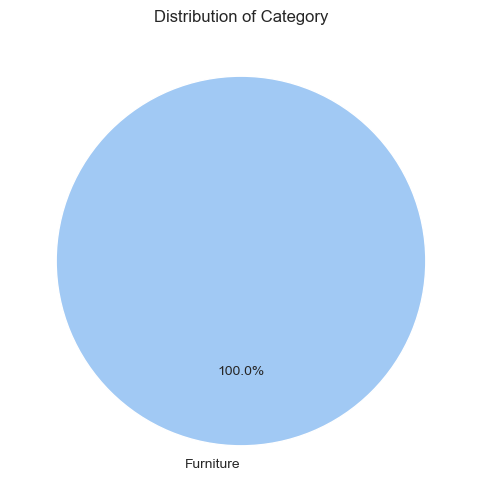

In [7]:
# Plot pie chart for 'Segment'
plt.figure(figsize=(10, 6))
store_sales_df['Segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Segment')
plt.ylabel('')  # Hide y-label
plt.show()

# Plot pie chart for 'Category'
plt.figure(figsize=(10, 6))
store_sales_df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Category')
plt.ylabel('')  # Hide y-label
plt.show()

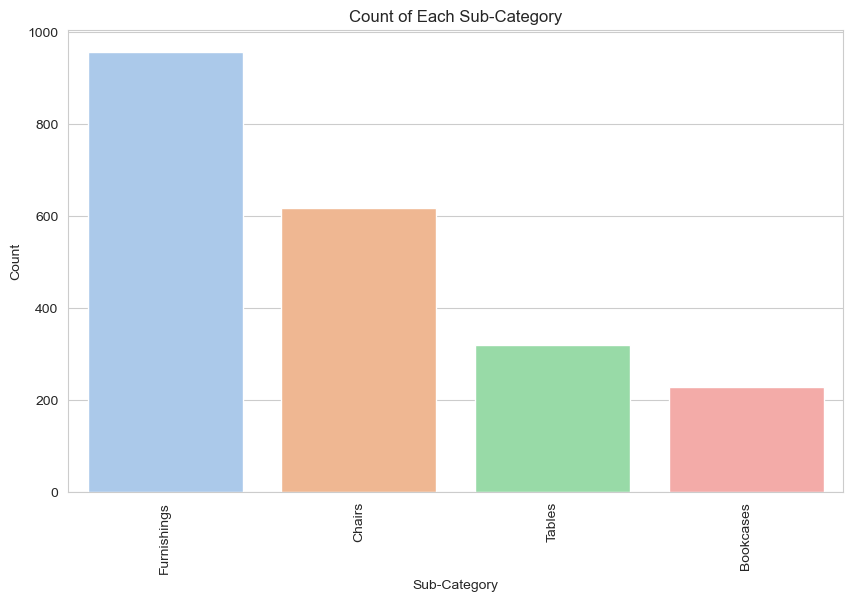

In [8]:
# Plot the count of each category in 'Sub-Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=store_sales_df, x='Sub-Category', palette="pastel", order=store_sales_df['Sub-Category'].value_counts().index)
plt.title('Count of Each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

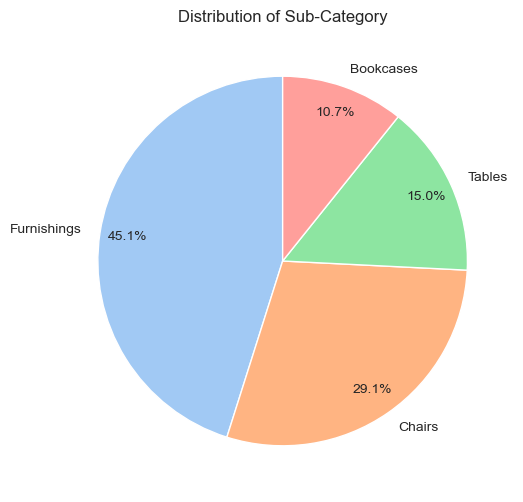

In [9]:
# Plot the Pie-chart in 'Sub-Category'
plt.figure(figsize=(6, 6))
store_sales_df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), pctdistance=0.85)
plt.title('Distribution of Sub-Category')
plt.ylabel('')  # Hide y-label
plt.show()

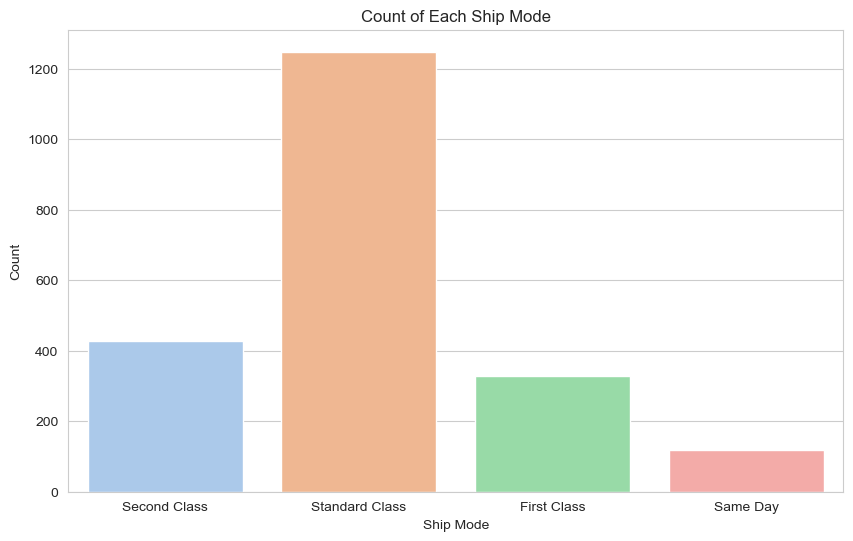

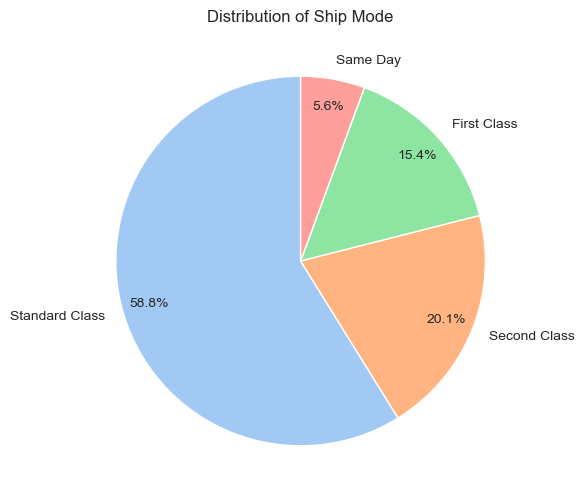

In [10]:
# Plot the count of each category in 'Ship Mode' (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=store_sales_df, x='Ship Mode', palette="pastel")
plt.title('Count of Each Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

# Plot pie chart for 'Ship Mode'
plt.figure(figsize=(10, 6))
store_sales_df['Ship Mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), pctdistance=0.85)
plt.title('Distribution of Ship Mode')
plt.ylabel('')  # Hide y-label
plt.show()

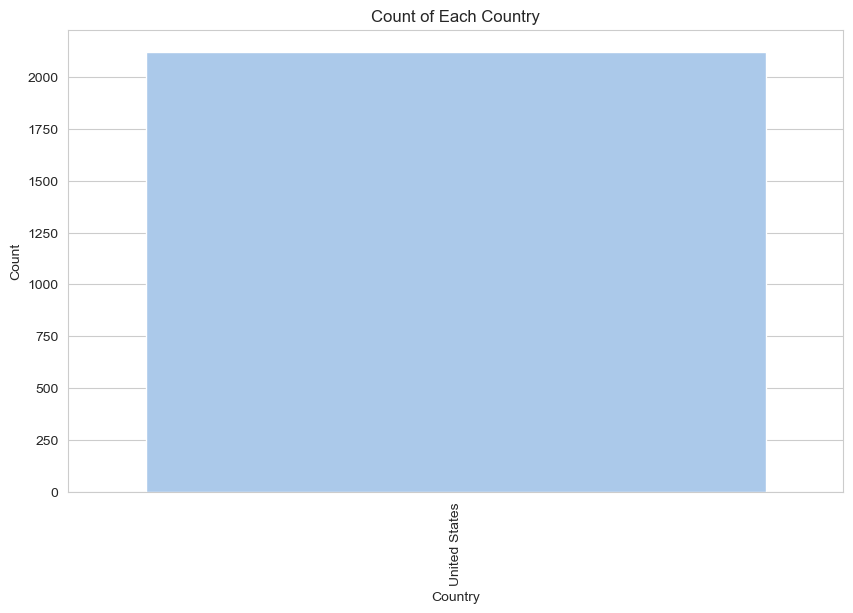

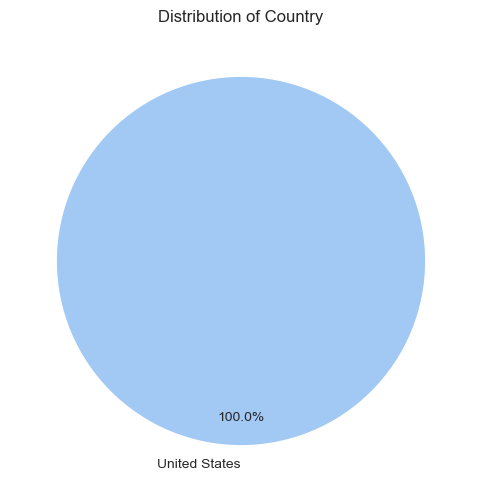

In [11]:
# Plot the count of each category in 'Country' (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=store_sales_df, x='Country', palette="pastel", order=store_sales_df['Country'].value_counts().index)
plt.title('Count of Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Plot pie chart for 'Country'
plt.figure(figsize=(10, 6))
store_sales_df['Country'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), pctdistance=0.85)
plt.title('Distribution of Country')
plt.ylabel('')  # Hide y-label
plt.show()

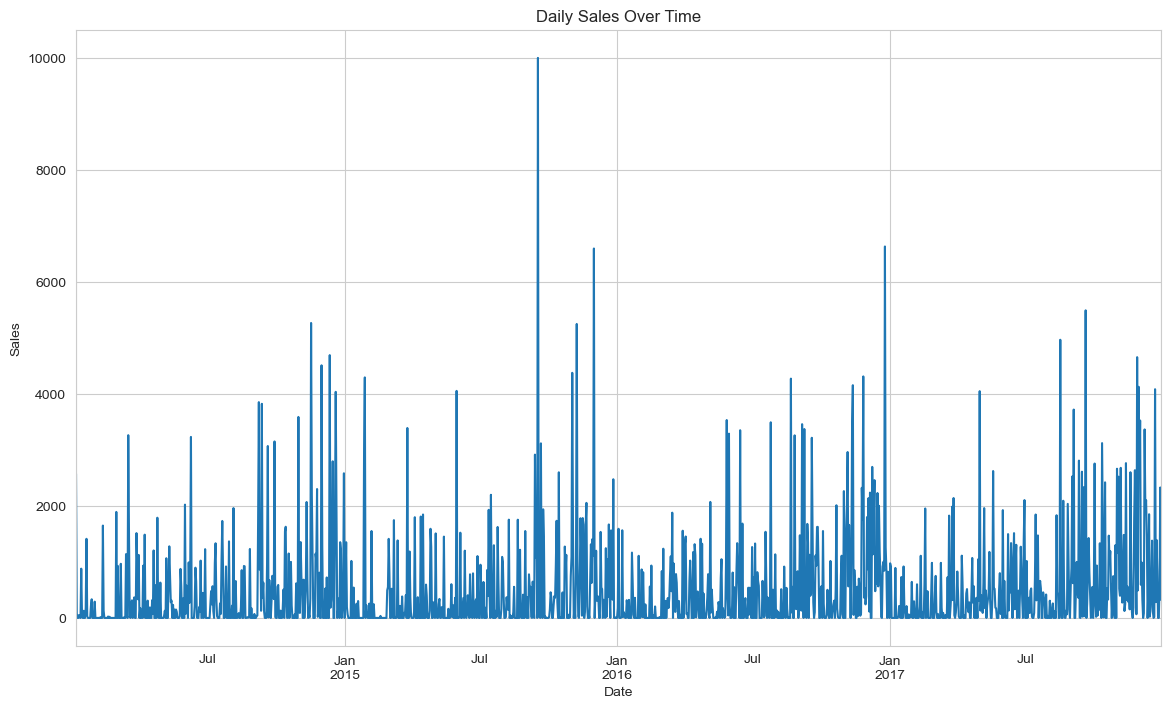

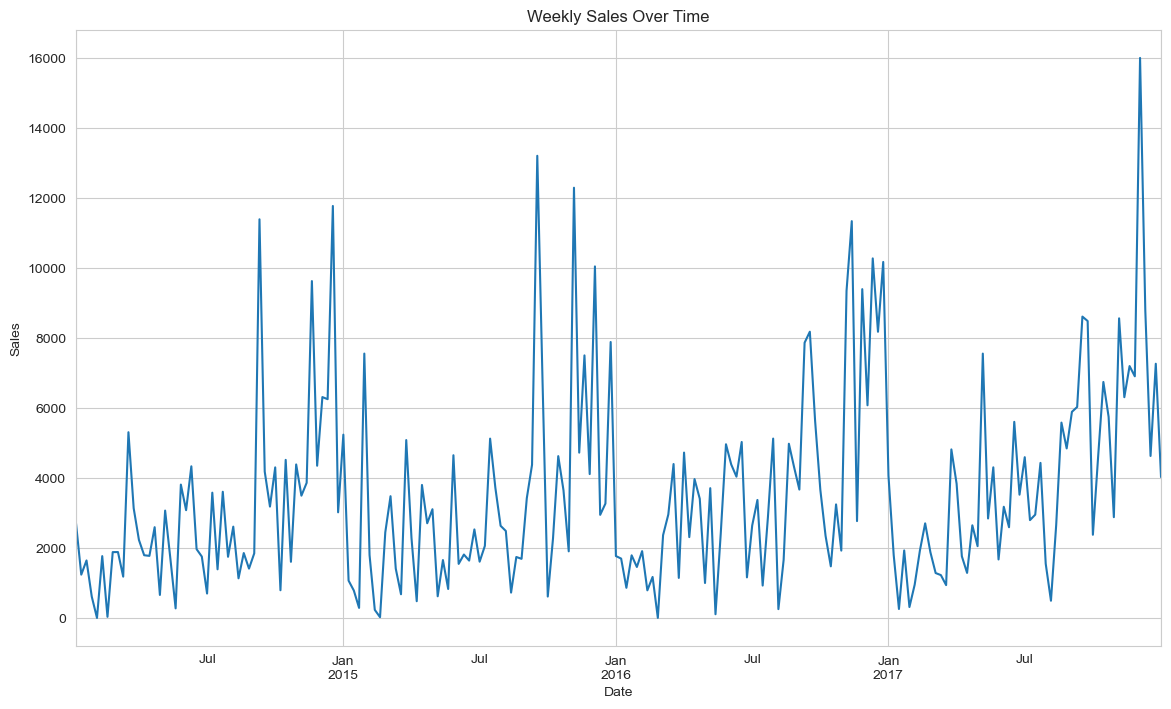

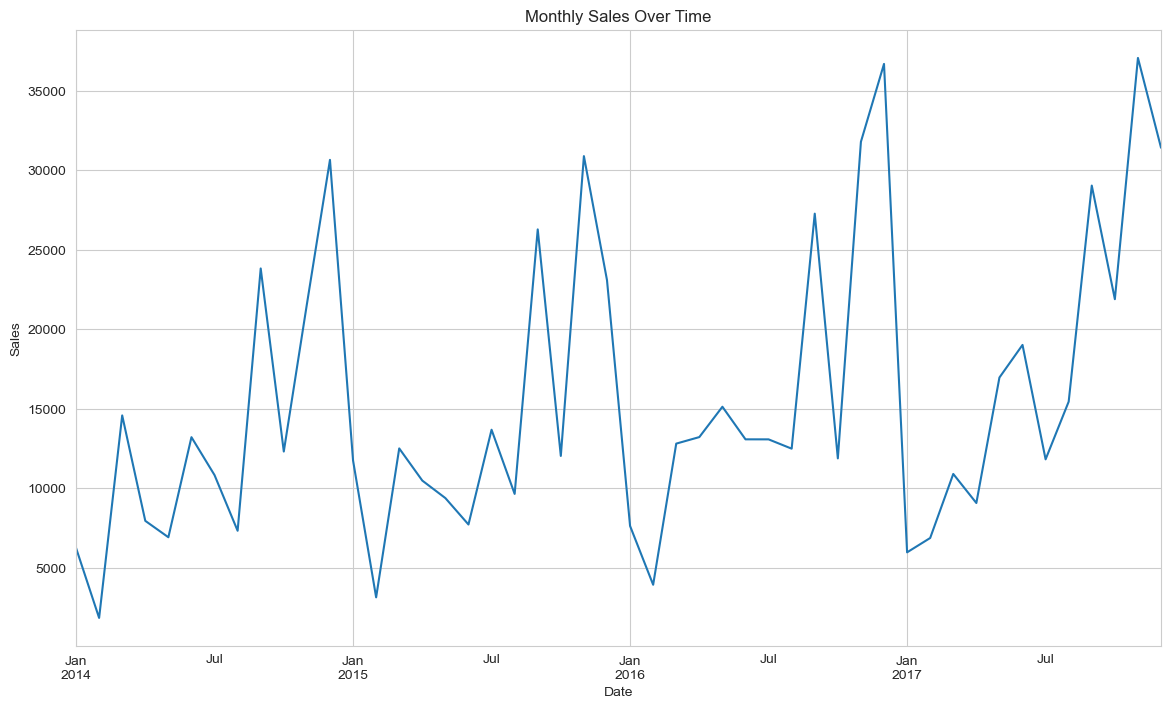

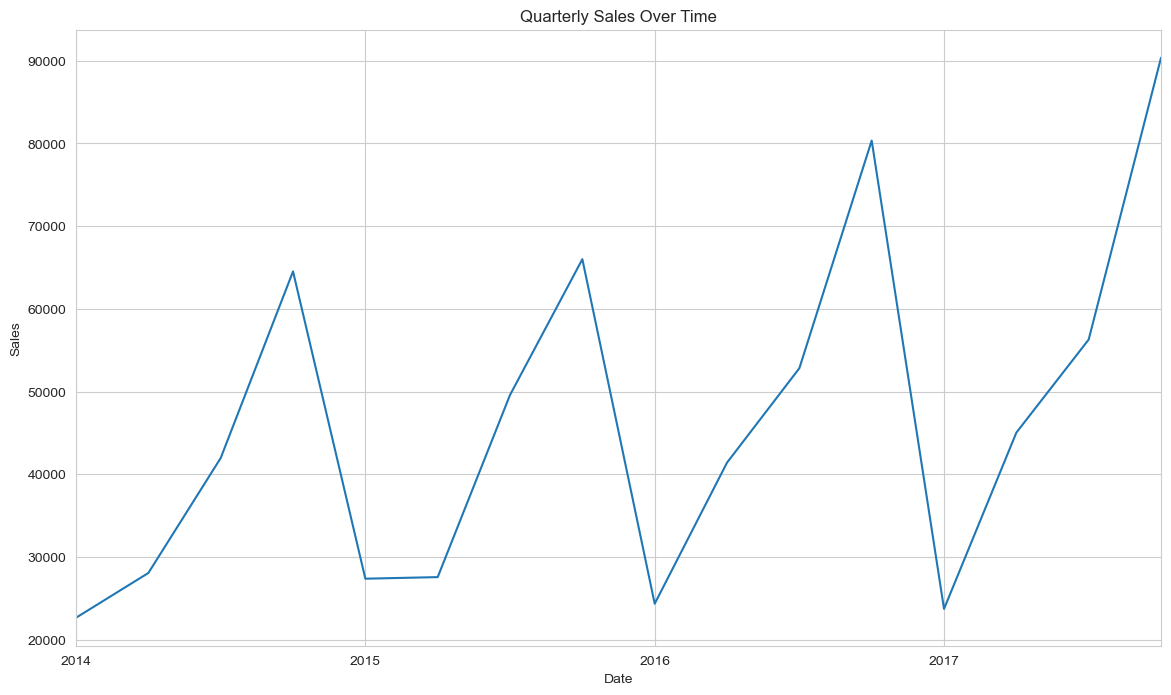

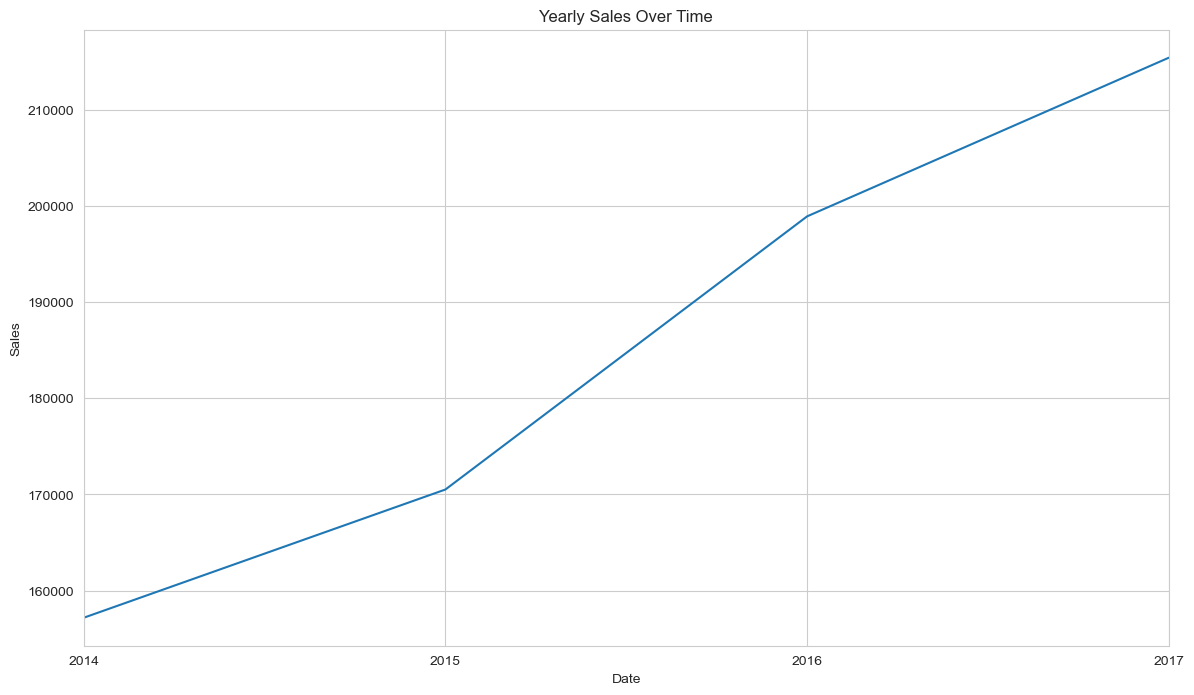

In [12]:
# Convert 'Order Date' column to datetime type
store_sales_df['Order Date'] = pd.to_datetime(store_sales_df['Order Date'])

# Aggregate data by day, week, month, quarter, and year
daily_sales = store_sales_df.resample('D', on='Order Date')['Sales'].sum()
weekly_sales = store_sales_df.resample('W', on='Order Date')['Sales'].sum()
monthly_sales = store_sales_df.resample('M', on='Order Date')['Sales'].sum()
quarterly_sales = store_sales_df.resample('Q', on='Order Date')['Sales'].sum()
yearly_sales = store_sales_df.resample('Y', on='Order Date')['Sales'].sum()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualize daily aggregated sales data
plt.figure(figsize=(14, 8))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualize weekly aggregated sales data
plt.figure(figsize=(14, 8))
weekly_sales.plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualize monthly aggregated sales data
plt.figure(figsize=(14, 8))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualize quarterly aggregated sales data
plt.figure(figsize=(14, 8))
quarterly_sales.plot()
plt.title('Quarterly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualize yearly aggregated sales data
plt.figure(figsize=(14, 8))
yearly_sales.plot()
plt.title('Yearly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

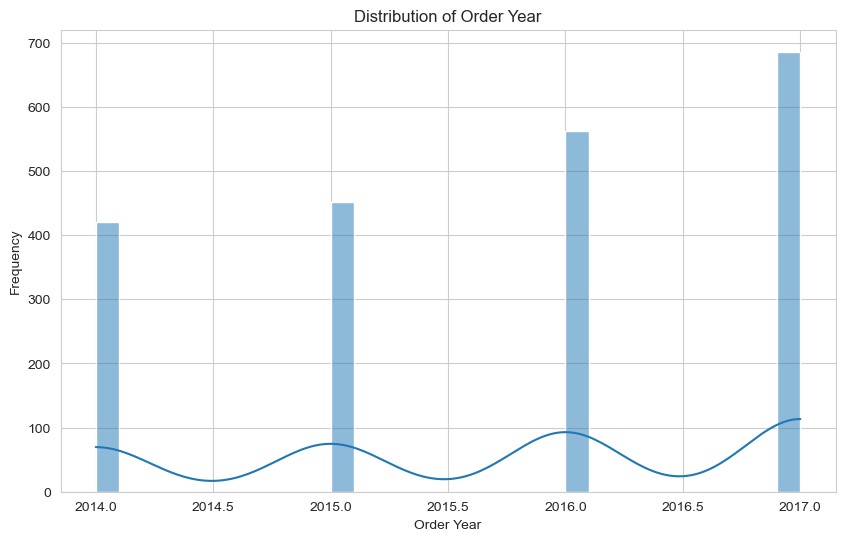

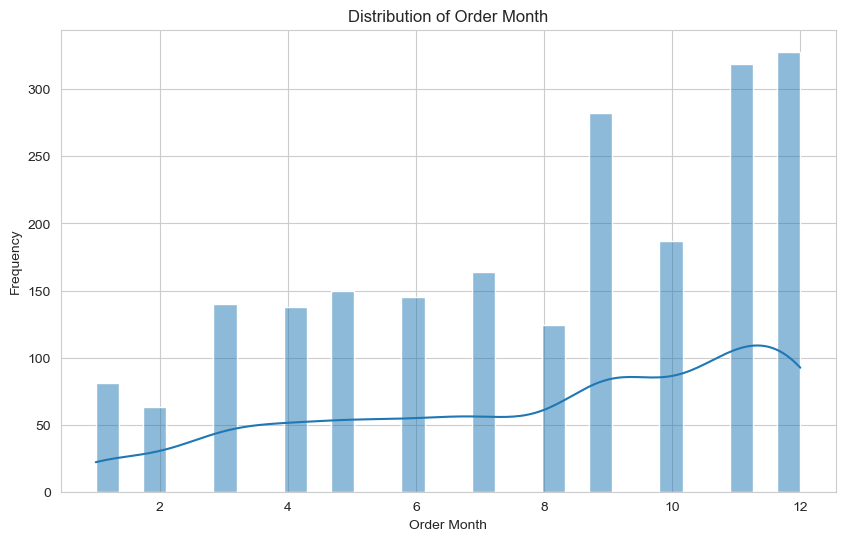

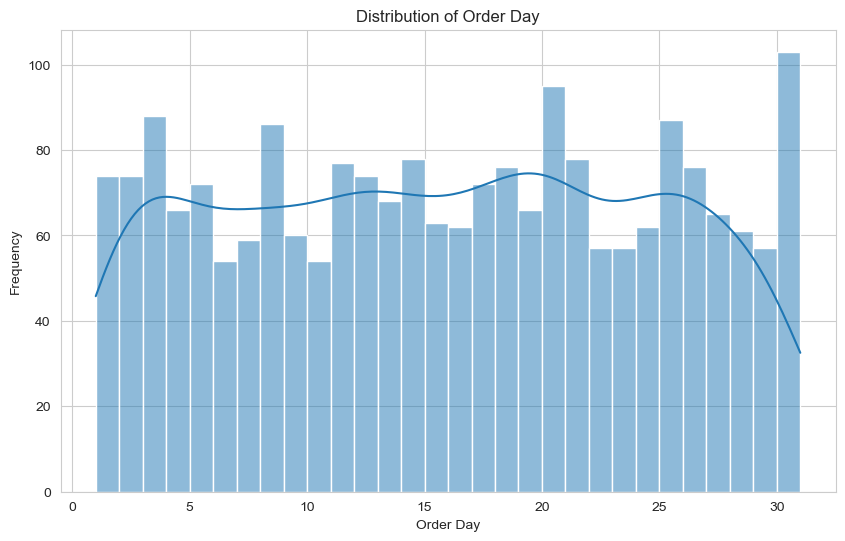

In [13]:
# Convert 'Order Date' and 'Ship Date' to datetime
store_sales_df['Order Date'] = pd.to_datetime(store_sales_df['Order Date'])

# Convert datetime columns to numerical by extracting useful features
store_sales_df['Order Year'] = store_sales_df['Order Date'].dt.year
store_sales_df['Order Month'] = store_sales_df['Order Date'].dt.month
store_sales_df['Order Day'] = store_sales_df['Order Date'].dt.day

# Drop the original datetime columns
store_sales_df.drop(columns=['Order Date'], inplace=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualize the distribution of Order Year, Order Month, and Order Day
date_features = ['Order Year', 'Order Month', 'Order Day']
for feature in date_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(store_sales_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Ensure the number of product name in the dataset
unique_product_names = store_sales_df['Segment'].nunique()
print(f'The number of Segment in the dataset is: {unique_product_names}')

The number of Segment in the dataset is: 3


In [15]:
# Convert categorical columns to numerical using One-Hot Encoding
columns_to_encode = ['Ship Mode', 'Segment', 'Sub-Category']
store_sales_df_encoded = pd.get_dummies(store_sales_df, columns=columns_to_encode, drop_first=False)

# Display the first few rows of the transformed dataset to verify changes
print(store_sales_df_encoded.head())

   Row ID        Order ID   Ship Date Customer ID    Customer Name  \
0       1  CA-2016-152156  11/11/2016    CG-12520      Claire Gute   
1       2  CA-2016-152156  11/11/2016    CG-12520      Claire Gute   
2       4  US-2015-108966  10/18/2015    SO-20335   Sean O'Donnell   
3       6  CA-2014-115812   6/14/2014    BH-11710  Brosina Hoffman   
4      11  CA-2014-115812   6/14/2014    BH-11710  Brosina Hoffman   

         Country             City       State  Postal Code Region  ...  \
0  United States        Henderson    Kentucky        42420  South  ...   
1  United States        Henderson    Kentucky        42420  South  ...   
2  United States  Fort Lauderdale     Florida        33311  South  ...   
3  United States      Los Angeles  California        90032   West  ...   
4  United States      Los Angeles  California        90032   West  ...   

  Ship Mode_Same Day Ship Mode_Second Class Ship Mode_Standard Class  \
0                  0                      1                   

In [16]:
print(store_sales_df_encoded.columns)

Index(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Year', 'Order Month', 'Order Day', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables'],
      dtype='object')


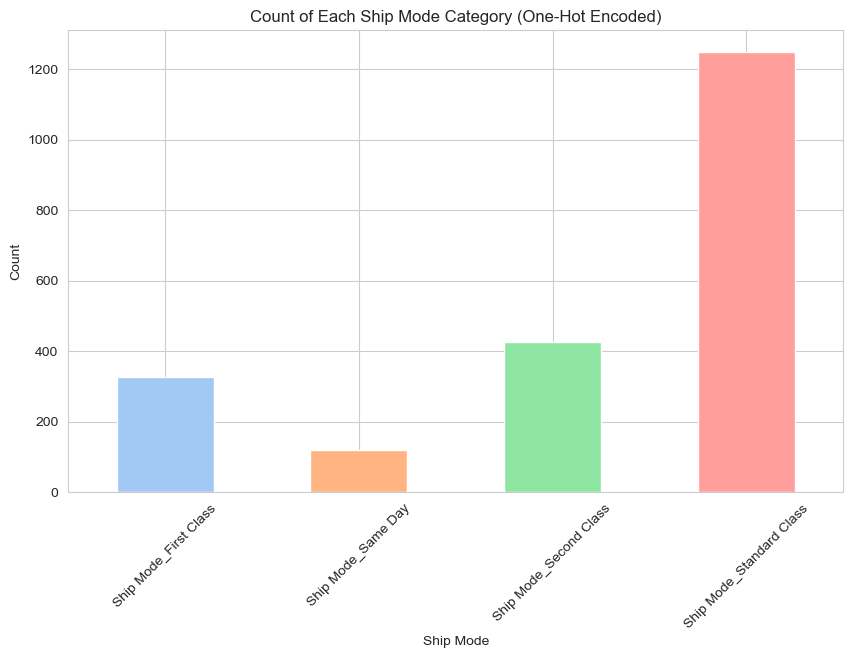

In [17]:
# Visualize One-Hot Encoded categorical columns

# Visualize the count of each One-Hot encoded 'Ship Mode' column
plt.figure(figsize=(10, 6))
ship_mode_columns = [col for col in store_sales_df_encoded.columns if 'Ship Mode' in col]
store_sales_df_encoded[ship_mode_columns].sum().plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Count of Each Ship Mode Category (One-Hot Encoded)')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


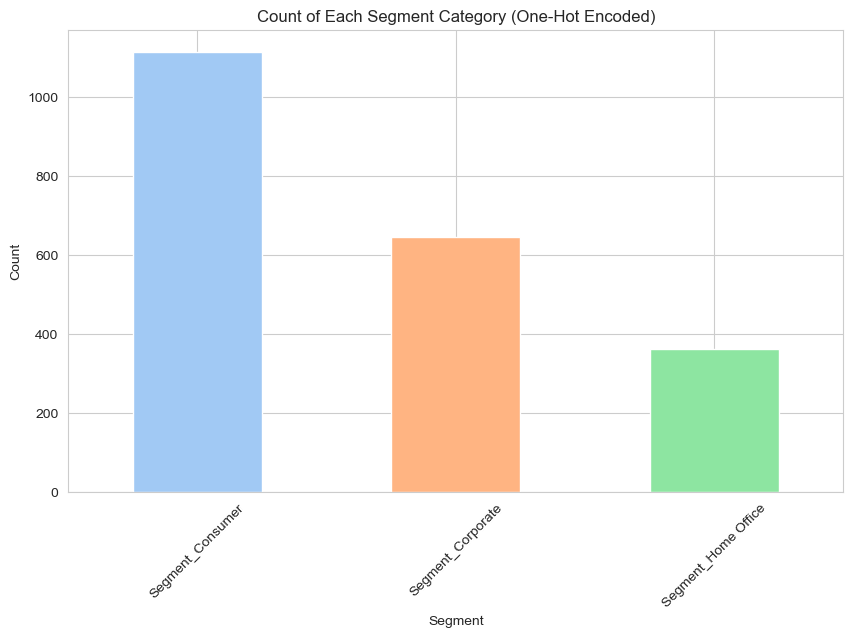

In [18]:
# Visualize the count of each One-Hot encoded 'Segment' column
plt.figure(figsize=(10, 6))
Segment_columns = [col for col in store_sales_df_encoded.columns if 'Segment' in col]
store_sales_df_encoded[Segment_columns].sum().plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Count of Each Segment Category (One-Hot Encoded)')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


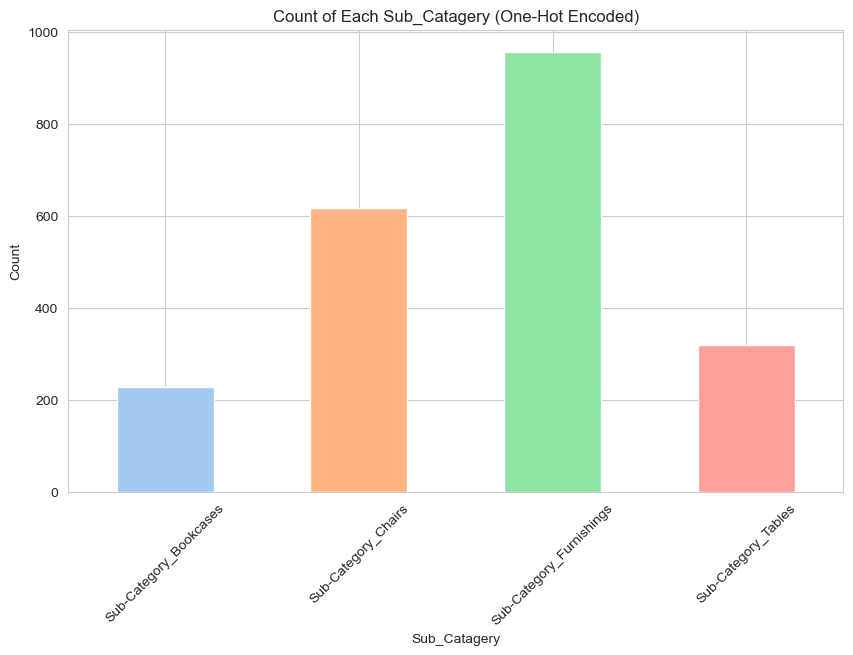

In [19]:
# Visualize the count of each One-Hot encoded 'Sub-Category' column
plt.figure(figsize=(10, 6))
Sub_Catagery_columns = [col for col in store_sales_df_encoded.columns if 'Sub-Category' in col]
store_sales_df_encoded[Sub_Catagery_columns].sum().plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Count of Each Sub_Catagery (One-Hot Encoded)')
plt.xlabel('Sub_Catagery')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 3. Clean data

In [20]:
#Display basic information about the dataset
print(store_sales_df_encoded.info())

#Display statistical description of the numerical features in the dataset
print(store_sales_df_encoded.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Row ID                    2121 non-null   int64  
 1   Order ID                  2121 non-null   object 
 2   Ship Date                 2121 non-null   object 
 3   Customer ID               2121 non-null   object 
 4   Customer Name             2121 non-null   object 
 5   Country                   2121 non-null   object 
 6   City                      2121 non-null   object 
 7   State                     2121 non-null   object 
 8   Postal Code               2121 non-null   int64  
 9   Region                    2121 non-null   object 
 10  Product ID                2121 non-null   object 
 11  Category                  2121 non-null   object 
 12  Product Name              2121 non-null   object 
 13  Sales                     2121 non-null   float64
 14  Quantity

In [21]:
#Handling missing values
print("Cheking for missing values:")
print(store_sales_df_encoded.isnull().sum())

Cheking for missing values:
Row ID                      0
Order ID                    0
Ship Date                   0
Customer ID                 0
Customer Name               0
Country                     0
City                        0
State                       0
Postal Code                 0
Region                      0
Product ID                  0
Category                    0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Order Year                  0
Order Month                 0
Order Day                   0
Ship Mode_First Class       0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Sub-Category_Bookcases      0
Sub-Category_Chairs         0
Sub-Category_Furnishings    0
Sub-Category_Tables         0
dtype: int64


In [22]:
# Removing duplicates
store_sales_df_encoded.drop_duplicates(inplace = True)

In [23]:
# Handling outliers
# For simplicity, I assume I want to cap the profit and sales at thr 99th percentile to remove outliers
sales_cap = store_sales_df_encoded['Sales'].quantile(0.99)
profit_cap = store_sales_df_encoded['Profit'].quantile(0.99)

store_sales_df_encoded = store_sales_df_encoded[store_sales_df_encoded['Sales'] <= sales_cap]
store_sales_df_encoded = store_sales_df_encoded[store_sales_df_encoded['Profit'] <= profit_cap]

In [24]:
# Ensure the number of unique city in the dataset
unique_cities = store_sales_df['City'].nunique()
print(f'The number of unique cities in the dataset is: {unique_cities}')

# Ensure the number of unique city in the dataset
unique_states = store_sales_df['State'].nunique()
print(f'The number of unique states in the dataset is: {unique_states}')

# Ensure the number of product name in the dataset
unique_product_names = store_sales_df['Product Name'].nunique()
print(f'The number of unique product names in the dataset is: {unique_product_names}')

The number of unique cities in the dataset is: 371
The number of unique states in the dataset is: 48
The number of unique product names in the dataset is: 380


In [25]:
# Columns to drop
columns_to_drop = [
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Category',
    'Country', 'City', 'State', 'Region', 'Product Name', 'Ship Date','Product ID'
]

# Drop the specified columns
store_sales_df_encoded.drop(columns=columns_to_drop, inplace=True)

# Display the resulting dataframe
print(store_sales_df_encoded)

      Postal Code      Sales  Quantity  Discount    Profit  Order Year  \
0           42420   261.9600         2      0.00   41.9136        2016   
1           42420   731.9400         3      0.00  219.5820        2016   
2           33311   957.5775         5      0.45 -383.0310        2015   
3           90032    48.8600         7      0.00   14.1694        2014   
4           90032  1706.1840         9      0.20   85.3092        2014   
...           ...        ...       ...       ...       ...         ...   
2116        77041   383.4656         4      0.32  -67.6704        2015   
2117        19711    13.4000         1      0.00    6.4320        2016   
2118        70506    85.9800         1      0.00   22.3548        2015   
2119        33180    25.2480         3      0.20    4.1028        2014   
2120        92627    91.9600         2      0.00   15.6332        2017   

      Order Month  Order Day  Ship Mode_First Class  Ship Mode_Same Day  \
0              11          8        

## 4. Identify correlated variables

In [26]:
# Save the dataframe to a CSV file
output_file_path = '../0. Resources/datasets/X store sales/store_sales_encoded.csv'
store_sales_df_encoded.to_csv(output_file_path, index=False)

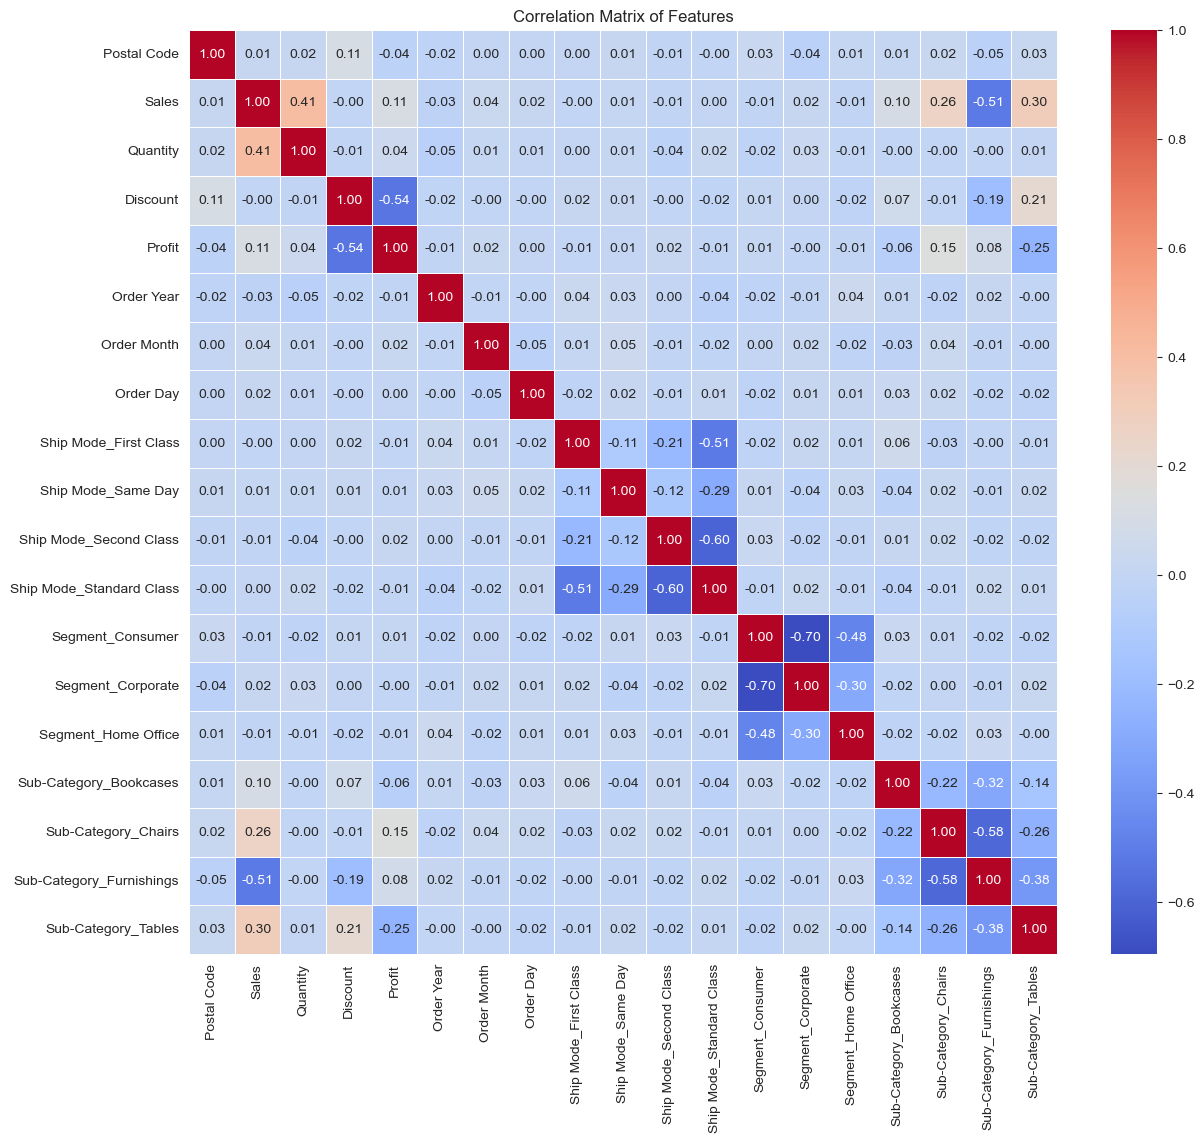

In [27]:
# Reload the dataset
store_sales_df_model = pd.read_csv('../0. Resources/datasets/X store sales/store_sales_encoded.csv')

# Calculate the correlation matrix
correlation_matrix = store_sales_df_model.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix of Features')
plt.show()

In [28]:
store_sales_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Postal Code               2086 non-null   int64  
 1   Sales                     2086 non-null   float64
 2   Quantity                  2086 non-null   int64  
 3   Discount                  2086 non-null   float64
 4   Profit                    2086 non-null   float64
 5   Order Year                2086 non-null   int64  
 6   Order Month               2086 non-null   int64  
 7   Order Day                 2086 non-null   int64  
 8   Ship Mode_First Class     2086 non-null   int64  
 9   Ship Mode_Same Day        2086 non-null   int64  
 10  Ship Mode_Second Class    2086 non-null   int64  
 11  Ship Mode_Standard Class  2086 non-null   int64  
 12  Segment_Consumer          2086 non-null   int64  
 13  Segment_Corporate         2086 non-null   int64  
 14  Segment_

In [29]:
# Convert Order Year, Order Month, and Order Day to datetime format and create additional time features
store_sales_df_model['Order Date'] = pd.to_datetime(
    store_sales_df_model['Order Year'].astype(str) + '-' +
    store_sales_df_model['Order Month'].astype(str) + '-' +
    store_sales_df_model['Order Day'].astype(str)
)

In [30]:
# Create new time-related features
store_sales_df_model['Week'] = store_sales_df_model['Order Date'].dt.isocalendar().week
store_sales_df_model['Quarter'] = store_sales_df_model['Order Date'].dt.quarter

# Drop the original date columns to avoid redundancy
store_sales_df_model = store_sales_df_model.drop(columns=['Order Year', 'Order Month', 'Order Day'])

# Generate lag features for the 'Sales' column
store_sales_df_model['Sales_Lag_1'] = store_sales_df_model['Sales'].shift(1)
store_sales_df_model['Sales_Lag_2'] = store_sales_df_model['Sales'].shift(2)
store_sales_df_model['Sales_Lag_3'] = store_sales_df_model['Sales'].shift(3)

# Generate rolling mean features for the 'Sales' column
store_sales_df_model['Sales_Rolling_Mean_3'] = store_sales_df_model['Sales'].rolling(window=3).mean()
store_sales_df_model['Sales_Rolling_Mean_7'] = store_sales_df_model['Sales'].rolling(window=7).mean()

# Drop rows with NaN values generated by shifting/rolling operations
store_sales_df_model = store_sales_df_model.dropna()

In [31]:
# Display the updated dataset to check the new features
print(store_sales_df_model.head())

    Postal Code      Sales  Quantity  Discount    Profit  \
6         84057  1044.6300         3      0.00  240.2649   
7         19140   124.2000         3      0.20   15.5250   
8         75080   190.9200         5      0.60 -147.9630   
9         77041   532.3992         3      0.32  -46.9764   
10        77041   212.0580         3      0.30  -15.1470   

    Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  \
6                       0                   0                       0   
7                       0                   0                       0   
8                       1                   0                       0   
9                       0                   0                       0   
10                      0                   0                       0   

    Ship Mode_Standard Class  Segment_Consumer  ...  Sub-Category_Furnishings  \
6                          1                 1  ...                         0   
7                          1          

C:\Users\wangy\AppData\Local\Temp\ipykernel_33432\4162377769.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store_sales_df_model.corr()


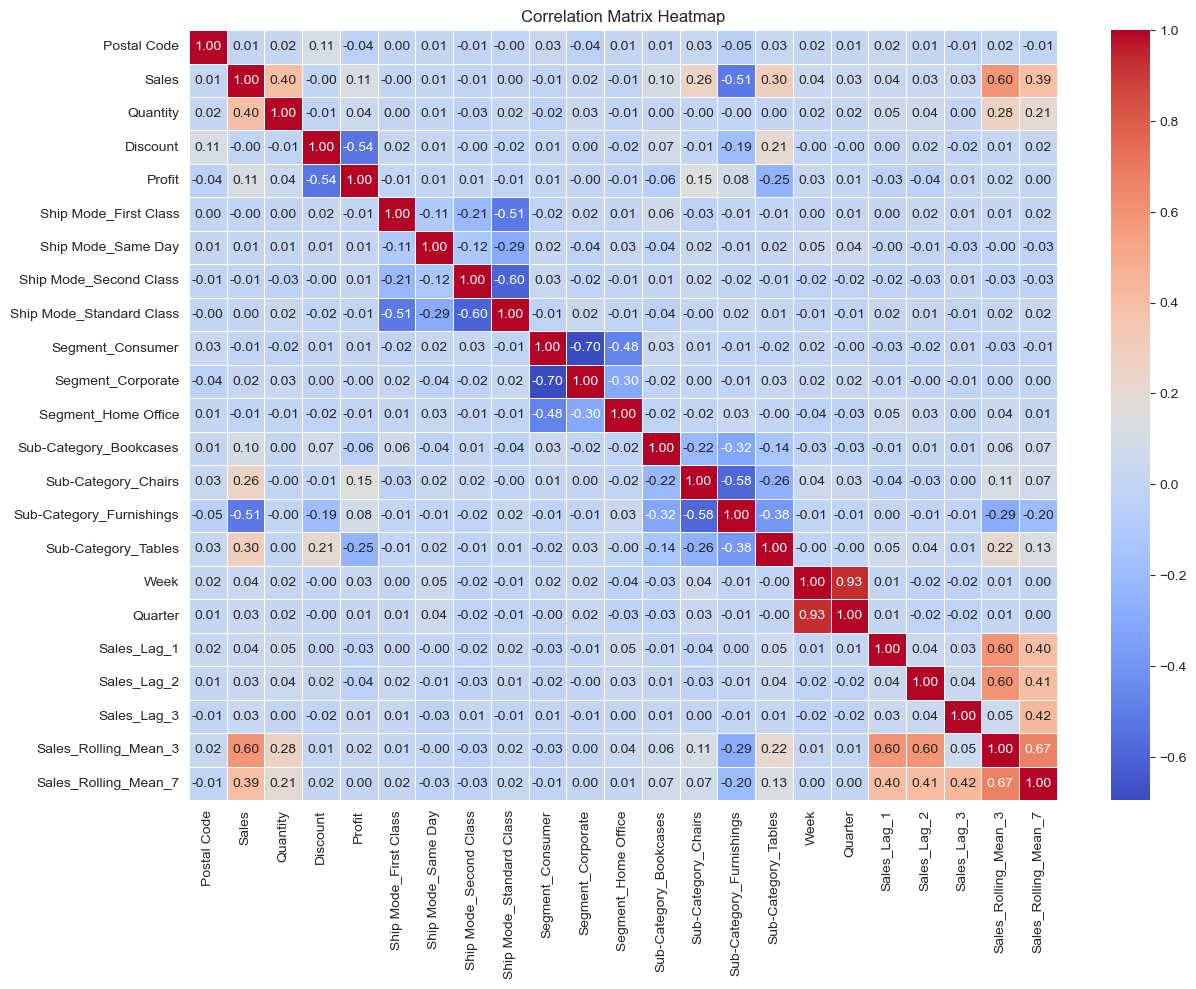

In [33]:
# Calculate the correlation matrix
correlation_matrix = store_sales_df_model.corr()

# Draw the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
# Correlation analysis
correlation_matrix = store_sales_df_model.corr()
print(correlation_matrix['Sales'].sort_values(ascending=False))

Sales                       1.000000
Sales_Rolling_Mean_3        0.595921
Quantity                    0.403819
Sales_Rolling_Mean_7        0.392974
Sub-Category_Tables         0.295041
Sub-Category_Chairs         0.262512
Profit                      0.114192
Sub-Category_Bookcases      0.104058
Week                        0.039652
Sales_Lag_1                 0.038428
Sales_Lag_3                 0.032298
Sales_Lag_2                 0.030605
Quarter                     0.027651
Segment_Corporate           0.019271
Ship Mode_Same Day          0.012716
Postal Code                 0.012661
Ship Mode_Standard Class    0.002628
Ship Mode_First Class      -0.003076
Discount                   -0.004970
Segment_Home Office        -0.007209
Ship Mode_Second Class     -0.007848
Segment_Consumer           -0.012340
Sub-Category_Furnishings   -0.512658
Name: Sales, dtype: float64


C:\Users\wangy\AppData\Local\Temp\ipykernel_33432\2222933495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store_sales_df_model.corr()


In [32]:
# Save the dataframe to a CSV file
output_file_path = '../0. Resources/datasets/X store sales/store_sales_model.csv'
store_sales_df_model.to_csv(output_file_path, index=False)

## 5. Summary

### Summary

#### 1. Find all variables and understand them
I choose the W store sales.
During the exploratory data analysis (EDA), I identified all the variables in the dataset and examined their characteristics. Key findings include:
- **Sales**: Continuous variable representing the sales amount.
- **Quantity**: Continuous variable representing the quantity of items sold.
- **Discount**: Continuous variable representing the discount applied.
- **Profit**: Continuous variable representing the profit made.
- **Categorical Variables**: Includes `Ship Mode`, `Segment`, `Sub-Category`, among others, which were initially non-numerical.

I used the `info()` and `describe()` methods to understand the data types and statistical summaries, respectively. I also visualized the categorical variables to understand their distributions.

#### 2. Visualise data
I visualized the data to uncover trends, patterns, and anomalies:
- **Sales Distribution**: Histogram and box plot showed the distribution and outliers in the sales data. It shows that sales are cyclical, usually peaking around Christmas.
- **Quantity and Profit**: Similar visualizations were created for quantity and profit to understand their distributions.
- **Categorical Variables**: Bar plots and pie charts were used to visualize the frequency of categories in variables like `Ship Mode`, `Segment`, and `Sub-Category`. There are 3, 4, and 4 types. There is only one type of `Category` and `Country`, which can be removed.
- **Country, State, Region, and City**: Their information can be represented by Postal codes, so these three attributes are not involved in the following analysis.

These visualizations helped me understand the central tendencies, variations, and potential outliers in the data.

#### 3. Clean data
Data cleaning involved handling missing values, outliers, and non-numerical variables:
- **Missing Values**: I checked for missing values and found that there were no missing values in the dataset.
- **Outliers**: I identified outliers in the `Sales` and `Profit` columns using box plots and decided on appropriate methods to handle them (e.g., capping or removing).
- **One-Hot Encoding**: I applied one-hot encoding to categorical variables like `Ship Mode`, `Segment`, and `Sub-Category` to convert them into numerical format, suitable for analysis and modeling.
- **Dropping Irrelevant Columns**: I removed columns like `Row ID`, `Order ID`,`Product ID`,`Ship Date`, `Customer ID`, `Customer Name`, `Country`, `City`, `State`, `Region`, and `Product Name` as they were not relevant for my analysis.

#### 4. Identify correlated variables
I analyzed the correlations between variables to identify significant relationships:
-**Lag features and rolling averages are generated**: Represents sales for the first 1,2,3 weeks and the mean value for the first 3,7 weeks, respectively, and is used for aggregation time.
- **Correlation Matrix**: I generated a correlation matrix and a heatmap to visualize the relationships between numerical variables.
- **Significant Correlations**: I chose attributes with correlations greater than 0.02 for analysis.
  - `Sales_Rolling_Mean_3` had a moderate positive correlation (approximately 0.60).
  - `Sub-Category_Furnishings` had a moderate negative correlation (approximately -0.51).
  - Other correlations were `Sales_Rolling_Mean_7`, `Sub-Category_Tables`, `Sub-Category_Chairs`,`Sub-Category_Bookcases`,`Week`, `Sales_Lag_1`, `Segment_Consumer`,`Sub-Category_Furnishings`

